# Skip Connection

In [1]:
# 라이브러리 준비
import tensorflow as tf

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 원핫 인코딩 수행
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [9]:
# 모델 생성

X = tf.keras.Input([32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

for i in range(32):
    H1 = tf.keras.layers.Dense(256)(H)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H = tf.keras.layers.Add()([H,H1])
    H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten_2 (Flatten)         (None, 3072)                 0         ['input_3[0][0]']             
                                                                                                  
 dense_36 (Dense)            (None, 256)                  786688    ['flatten_2[0][0]']           
                                                                                                  
 batch_normalization_35 (Ba  (None, 256)                  1024      ['dense_36[0][0]']            
 tchNormalization)                                                                          

 batch_normalization_42 (Ba  (None, 256)                  1024      ['dense_43[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 add_38 (Add)                (None, 256)                  0         ['activation_41[0][0]',       
                                                                     'batch_normalization_42[0][0]
                                                                    ']                            
                                                                                                  
 activation_42 (Activation)  (None, 256)                  0         ['add_38[0][0]']              
                                                                                                  
 dense_44 (Dense)            (None, 256)                  65792     ['activation_42[0][0]']       
          

                                                                                                  
 activation_49 (Activation)  (None, 256)                  0         ['add_45[0][0]']              
                                                                                                  
 dense_51 (Dense)            (None, 256)                  65792     ['activation_49[0][0]']       
                                                                                                  
 batch_normalization_50 (Ba  (None, 256)                  1024      ['dense_51[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 add_46 (Add)                (None, 256)                  0         ['activation_49[0][0]',       
                                                                     'batch_normalization_50[0][0]
          

 tchNormalization)                                                                                
                                                                                                  
 add_53 (Add)                (None, 256)                  0         ['activation_56[0][0]',       
                                                                     'batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 256)                  0         ['add_53[0][0]']              
                                                                                                  
 dense_59 (Dense)            (None, 256)                  65792     ['activation_57[0][0]']       
                                                                                                  
 batch_nor

 activation_64 (Activation)  (None, 256)                  0         ['add_60[0][0]']              
                                                                                                  
 dense_66 (Dense)            (None, 256)                  65792     ['activation_64[0][0]']       
                                                                                                  
 batch_normalization_65 (Ba  (None, 256)                  1024      ['dense_66[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 add_61 (Add)                (None, 256)                  0         ['activation_64[0][0]',       
                                                                     'batch_normalization_65[0][0]
                                                                    ']                            
          

In [10]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 10, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = model.fit(x_train,
                   y_train, 
                   epochs=10, 
                   batch_size=128, 
                   validation_split=0.2, 
                   callbacks=[early])

Epoch 1/10
313/313 [==============================] - 39s 86ms/step - loss: 2.5766 - accuracy: 0.2919 - val_loss: 15.3712 - val_accuracy: 0.1919
Epoch 2/10
313/313 [==============================] - 25s 80ms/step - loss: 1.8131 - accuracy: 0.4027 - val_loss: 1.8807 - val_accuracy: 0.3415
Epoch 3/10
313/313 [==============================] - 26s 83ms/step - loss: 1.6649 - accuracy: 0.4448 - val_loss: 1.8728 - val_accuracy: 0.3654
Epoch 4/10
313/313 [==============================] - 26s 84ms/step - loss: 1.5563 - accuracy: 0.4751 - val_loss: 4.4630 - val_accuracy: 0.2545
Epoch 5/10
313/313 [==============================] - 25s 78ms/step - loss: 1.4905 - accuracy: 0.5002 - val_loss: 2.0787 - val_accuracy: 0.3342
Epoch 6/10
313/313 [==============================] - 25s 79ms/step - loss: 1.4221 - accuracy: 0.5194 - val_loss: 1.8820 - val_accuracy: 0.3574
Epoch 7/10
313/313 [==============================] - 25s 80ms/step - loss: 1.3737 - accuracy: 0.5358 - val_loss: 2.3911 - val_accuracy

In [13]:
# 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.9592 - accuracy: 0.3640


[1.9592158794403076, 0.36399999260902405]

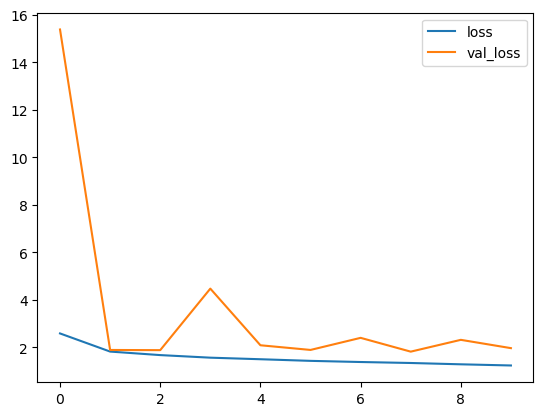

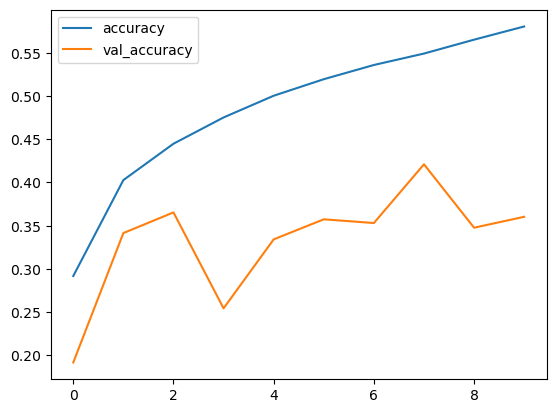

In [14]:
# 학습 시각화
import matplotlib.pyplot as plt

plt. plot(result.history['loss'])
plt. plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt. plot(result.history['accuracy'])
plt. plot(result.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

---

### 참고  skip connection

In [15]:
# 모델을 준비합니다.
X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(512)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

for i in range(16):
    H1 = tf.keras.layers.Dropout(0.5)(H)
    H1 = tf.keras.layers.Dense(512)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation('swish')(H1)

    H1 = tf.keras.layers.Dense(512)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H = tf.keras.layers.Add()([H, H1])
    H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(H)
model = tf.keras.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              # loss=tf.keras.losses.sparse_categorical_crossentropy,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # metrics=tf.keras.metrics.sparse_categorical_accuracy,
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten_3 (Flatten)         (None, 3072)                 0         ['input_4[0][0]']             
                                                                                                  
 dense_70 (Dense)            (None, 512)                  1573376   ['flatten_3[0][0]']           
                                                                                                  
 batch_normalization_68 (Ba  (None, 512)                  2048      ['dense_70[0][0]']            
 tchNormalization)                                                                          

 tchNormalization)                                                                                
                                                                                                  
 activation_75 (Activation)  (None, 512)                  0         ['batch_normalization_75[0][0]
                                                                    ']                            
                                                                                                  
 dense_78 (Dense)            (None, 512)                  262656    ['activation_75[0][0]']       
                                                                                                  
 batch_normalization_76 (Ba  (None, 512)                  2048      ['dense_78[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 add_67 (A

 batch_normalization_83 (Ba  (None, 512)                  2048      ['dense_85[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 activation_83 (Activation)  (None, 512)                  0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 dense_86 (Dense)            (None, 512)                  262656    ['activation_83[0][0]']       
                                                                                                  
 batch_normalization_84 (Ba  (None, 512)                  2048      ['dense_86[0][0]']            
 tchNormalization)                                                                                
          

                                                                                                  
 batch_normalization_91 (Ba  (None, 512)                  2048      ['dense_93[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 activation_91 (Activation)  (None, 512)                  0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 dense_94 (Dense)            (None, 512)                  262656    ['activation_91[0][0]']       
                                                                                                  
 batch_normalization_92 (Ba  (None, 512)                  2048      ['dense_94[0][0]']            
 tchNormal

 dense_101 (Dense)           (None, 512)                  262656    ['dropout_15[0][0]']          
                                                                                                  
 batch_normalization_99 (Ba  (None, 512)                  2048      ['dense_101[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_99 (Activation)  (None, 512)                  0         ['batch_normalization_99[0][0]
                                                                    ']                            
                                                                                                  
 dense_102 (Dense)           (None, 512)                  262656    ['activation_99[0][0]']       
                                                                                                  
 batch_nor